In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ks_2samp


ccpp_dataset: pd.DataFrame = pd.read_csv(filepath_or_buffer="coursework_other(1).csv")
print(ccpp_dataset.info())
print(ccpp_dataset.hist)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB
None
<bound method hist_frame of          AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]>


In [2]:
targets: pd.Series = ccpp_dataset['PE']
target_max: float = targets.max()
target_min: float = targets.min()
number_of_bins: int = 10
bin_intervals = list(np.linspace(target_min, target_max, number_of_bins + 1))
bin_intervals = bin_intervals[1: -1]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    ccpp_dataset.drop(columns='PE'),
    ccpp_dataset['PE'],
    test_size=0.1,
    random_state=42,
    shuffle=True,
    stratify=np.digitize(ccpp_dataset['PE'], bins=bin_intervals)
)

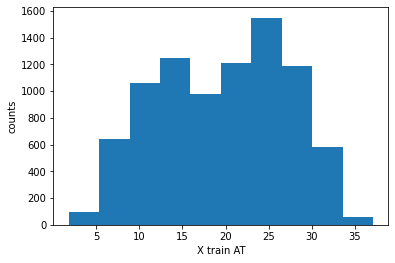

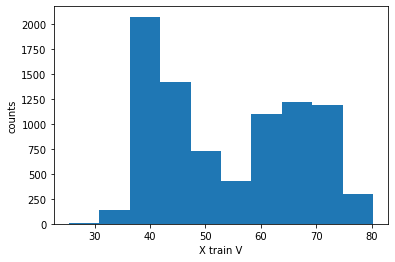

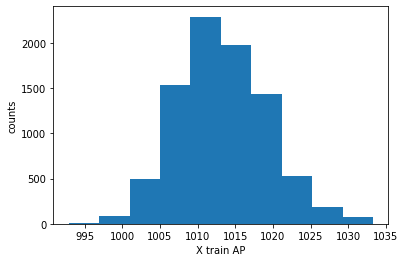

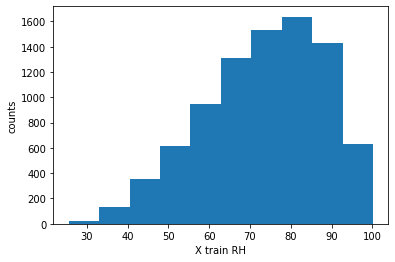

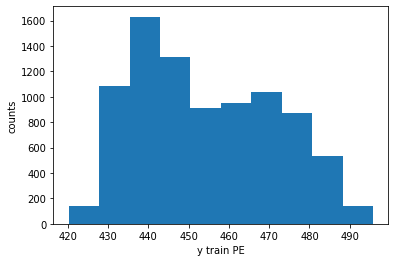

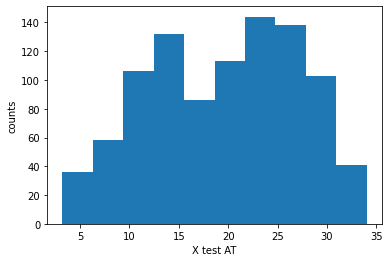

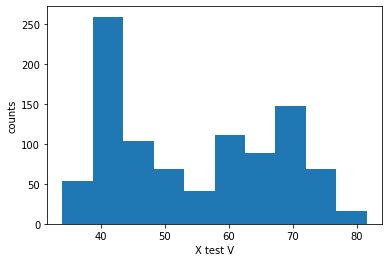

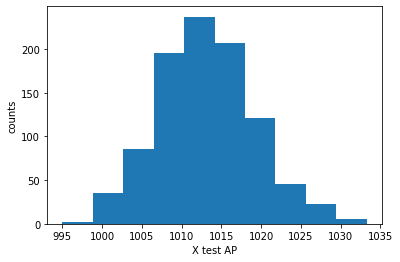

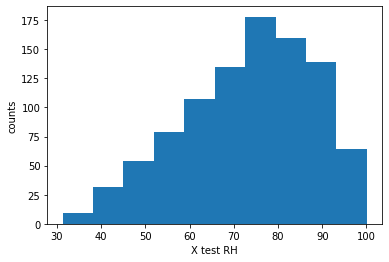

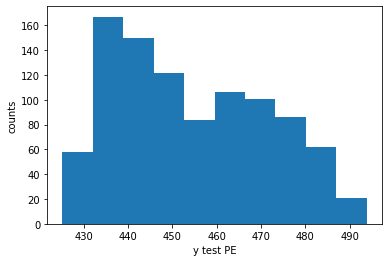

<Figure size 432x288 with 0 Axes>

In [4]:
def plot_histogram(df, column_name: str, df_name: str):
    if df_name[0] == 'X':
        plt.hist(df[column_name])
    else:
        plt.hist(df)
    plt.xlabel(f'{df_name} {column_name}')
    plt.ylabel('counts')
    plt.show()
    plt.clf()

for feature_name in X_train.columns:
    plot_histogram(X_train, feature_name, 'X train')

plot_histogram(y_train, 'PE', 'y train')

for feature_name in X_test.columns:
    plot_histogram(X_test, feature_name, 'X test')

plot_histogram(y_test, 'PE', 'y test')


In [5]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from typing import List
n_splits = 5


result = cross_validate(
    DummyRegressor(strategy='mean'),
    X_train,
    y_train,
    cv=KFold(n_splits=n_splits, shuffle=True, random_state=42
             ),
    scoring=('r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'),
    return_train_score=True
)

print(np.mean(result['train_r2']))
print(np.mean(result['test_r2']))
print(np.mean(result['train_neg_mean_absolute_error']))
print(np.mean(result['test_neg_mean_absolute_error']))
print(np.mean(result['train_neg_mean_squared_error']))
print(np.mean(result['test_neg_mean_squared_error']))


0.0
-0.0003008333498061955
-14.838834548151866
-14.839817023510083
-291.27220101834763
-291.3065975369109


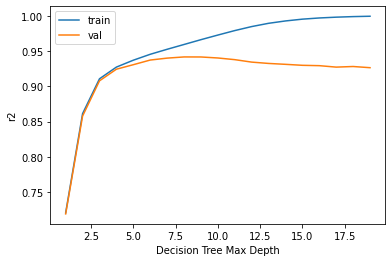

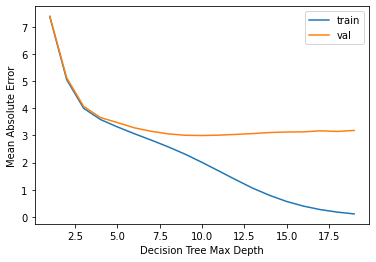

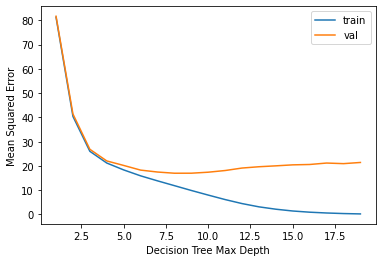

<Figure size 432x288 with 0 Axes>

In [6]:
from sklearn.tree import DecisionTreeRegressor
train_r2_scores = []
val_r2_scores = []
train_mae_scores = []
val_mae_scores = []
train_mse_scores = []
val_mse_scores = []
depths = range(1, 20)
for depth in depths:
    result = cross_validate(
        DecisionTreeRegressor(random_state=1, max_depth=depth),
        X_train,
        y_train,
        cv=KFold(n_splits=n_splits, shuffle=True, random_state=42),
        scoring=('r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'),
        return_train_score=True,
        return_estimator=True
    )
    train_r2_scores.append(np.mean(result['train_r2']))
    val_r2_scores.append(np.mean(result['test_r2']))
    train_mae_scores.append(np.mean(result['train_neg_mean_absolute_error']))
    val_mae_scores.append(np.mean(result['test_neg_mean_absolute_error']))
    train_mse_scores.append(np.mean(result['train_neg_mean_squared_error']))
    val_mse_scores.append(np.mean(result['test_neg_mean_squared_error']))

def plot_tree_max_depths(train, val, name: str):
    plt.plot(depths, train, label='train')
    plt.plot(depths, val, label='val')
    plt.ylabel(name)
    plt.xlabel('Decision Tree Max Depth')
    plt.legend()
    plt.show()
    plt.clf()

plot_tree_max_depths(train_r2_scores, val_r2_scores, 'r2')
plot_tree_max_depths(-np.array(train_mae_scores), -np.array(val_mae_scores), 'Mean Absolute Error')
plot_tree_max_depths(-np.array(train_mse_scores), -np.array(val_mse_scores), 'Mean Squared Error')

In [7]:
print(np.max(val_r2_scores), np.argmax(val_r2_scores) + 1)
print(-np.max(val_mae_scores), np.argmax(val_mae_scores) + 1)
print(-np.max(val_mse_scores), np.argmax(val_mse_scores) + 1)

0.94157108271107 8
2.9977673318414775 10
17.00402844481318 8


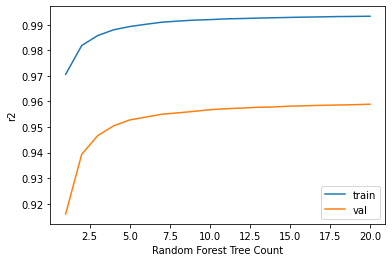

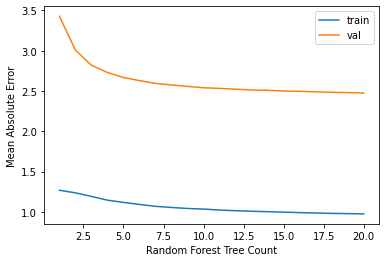

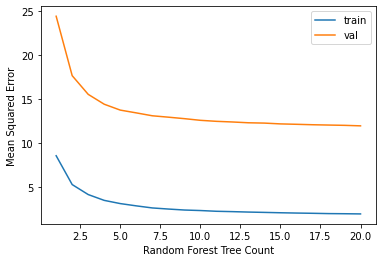

<Figure size 432x288 with 0 Axes>

In [8]:
from sklearn.ensemble import RandomForestRegressor

train_r2_scores = []
val_r2_scores = []
train_mae_scores = []
val_mae_scores = []
train_mse_scores = []
val_mse_scores = []
estimators = range(1, 21)
for count in estimators:
    result = cross_validate(
        RandomForestRegressor(n_estimators=count, random_state=1, max_depth=19),
        X_train,
        y_train,
        cv=KFold(n_splits=n_splits, shuffle=True, random_state=42),
        scoring=('r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'),
        return_train_score=True,
        return_estimator=True
    )
    train_r2_scores.append(np.mean(result['train_r2']))
    val_r2_scores.append(np.mean(result['test_r2']))
    train_mae_scores.append(np.mean(result['train_neg_mean_absolute_error']))
    val_mae_scores.append(np.mean(result['test_neg_mean_absolute_error']))
    train_mse_scores.append(np.mean(result['train_neg_mean_squared_error']))
    val_mse_scores.append(np.mean(result['test_neg_mean_squared_error']))

def plot_forest_max_depths(train: List, val: List, name: str):
    plt.plot(estimators, train, label='train')
    plt.plot(estimators, val, label='val')
    plt.ylabel(name)
    plt.xlabel('Random Forest Tree Count')
    plt.legend()
    plt.show()
    plt.clf()

plot_forest_max_depths(train_r2_scores, val_r2_scores, 'r2')
plot_forest_max_depths(-np.array(train_mae_scores), -np.array(val_mae_scores), 'Mean Absolute Error')
plot_forest_max_depths(-np.array(train_mse_scores), -np.array(val_mse_scores), 'Mean Squared Error')

In [9]:
print(np.max(val_r2_scores), np.argmax(val_r2_scores) + 1)
print(-np.max(val_mae_scores), np.argmax(val_mae_scores) + 1)
print(-np.max(val_mse_scores), np.argmax(val_mse_scores) + 1)

0.958925014753578 20
2.4750341059870036 20
11.958138712792124 20


In [10]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
result = cross_validate(
    RandomForestRegressor(n_estimators=20, random_state=1, max_depth=19),
    X_train,
    y_train,
    cv=KFold(n_splits=n_splits, shuffle=True, random_state=42),
    scoring=('r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'),
    return_train_score=True,
    return_estimator=True
)
forests = result['estimator']
test_r2_scores = []
test_mae_scores = []
test_mse_scores = []
for forest in forests:
    y_pred = forest.predict(X_test)
    test_r2_scores.append(r2_score(y_test, y_pred))
    test_mae_scores.append(mean_absolute_error(y_test, y_pred))
    test_mse_scores.append(mean_squared_error(y_test, y_pred))

print(np.mean(test_r2_scores))
print(np.mean(test_mae_scores))
print(np.mean(test_mse_scores))

0.9573926171146825
2.4094617639803095
12.400170075013687
